# This assignment framework provides a structured approach to implementing and analyzing clustering algorithms such as K-Means, Hierarchical,
# and DBSCAN on a real-world dataset. Let's break down the steps and expand on each part:
# 1. Data Preprocessing
# Step 1: Handle Missing Values

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
arr = None  # Invalid argument
np.array(arr)  # This will raise the error

# Load dataset
data = pd.read_csv(r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\wine.csv')

# Identify missing values
missing_values = data.isnull().sum()

# Impute missing values (mean for numerical, mode for categorical)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='mean')  # For numerical columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

imputer = SimpleImputer(strategy='most_frequent') 
# For categorical columns
#data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

In [ ]:
#Step 2: Remove Outliers
# Outliers can distort clustering results, so they are removed using the Z-score method.
# This method removes rows where the Z-score exceeds 3 (or any threshold you set).

In [12]:
from scipy import stats
import numpy as np

# Remove outliers using Z-score method
data = data[(np.abs(stats.zscore(data[numerical_cols])) < 3).all(axis=1)]

In [ ]:
#Step 3: Scale Features
#Clustering algorithms often perform better when the data is standardized, especially if features have different units or scales.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Exploratory Data Analysis (EDA)
# Step 1: Visualize Distributions

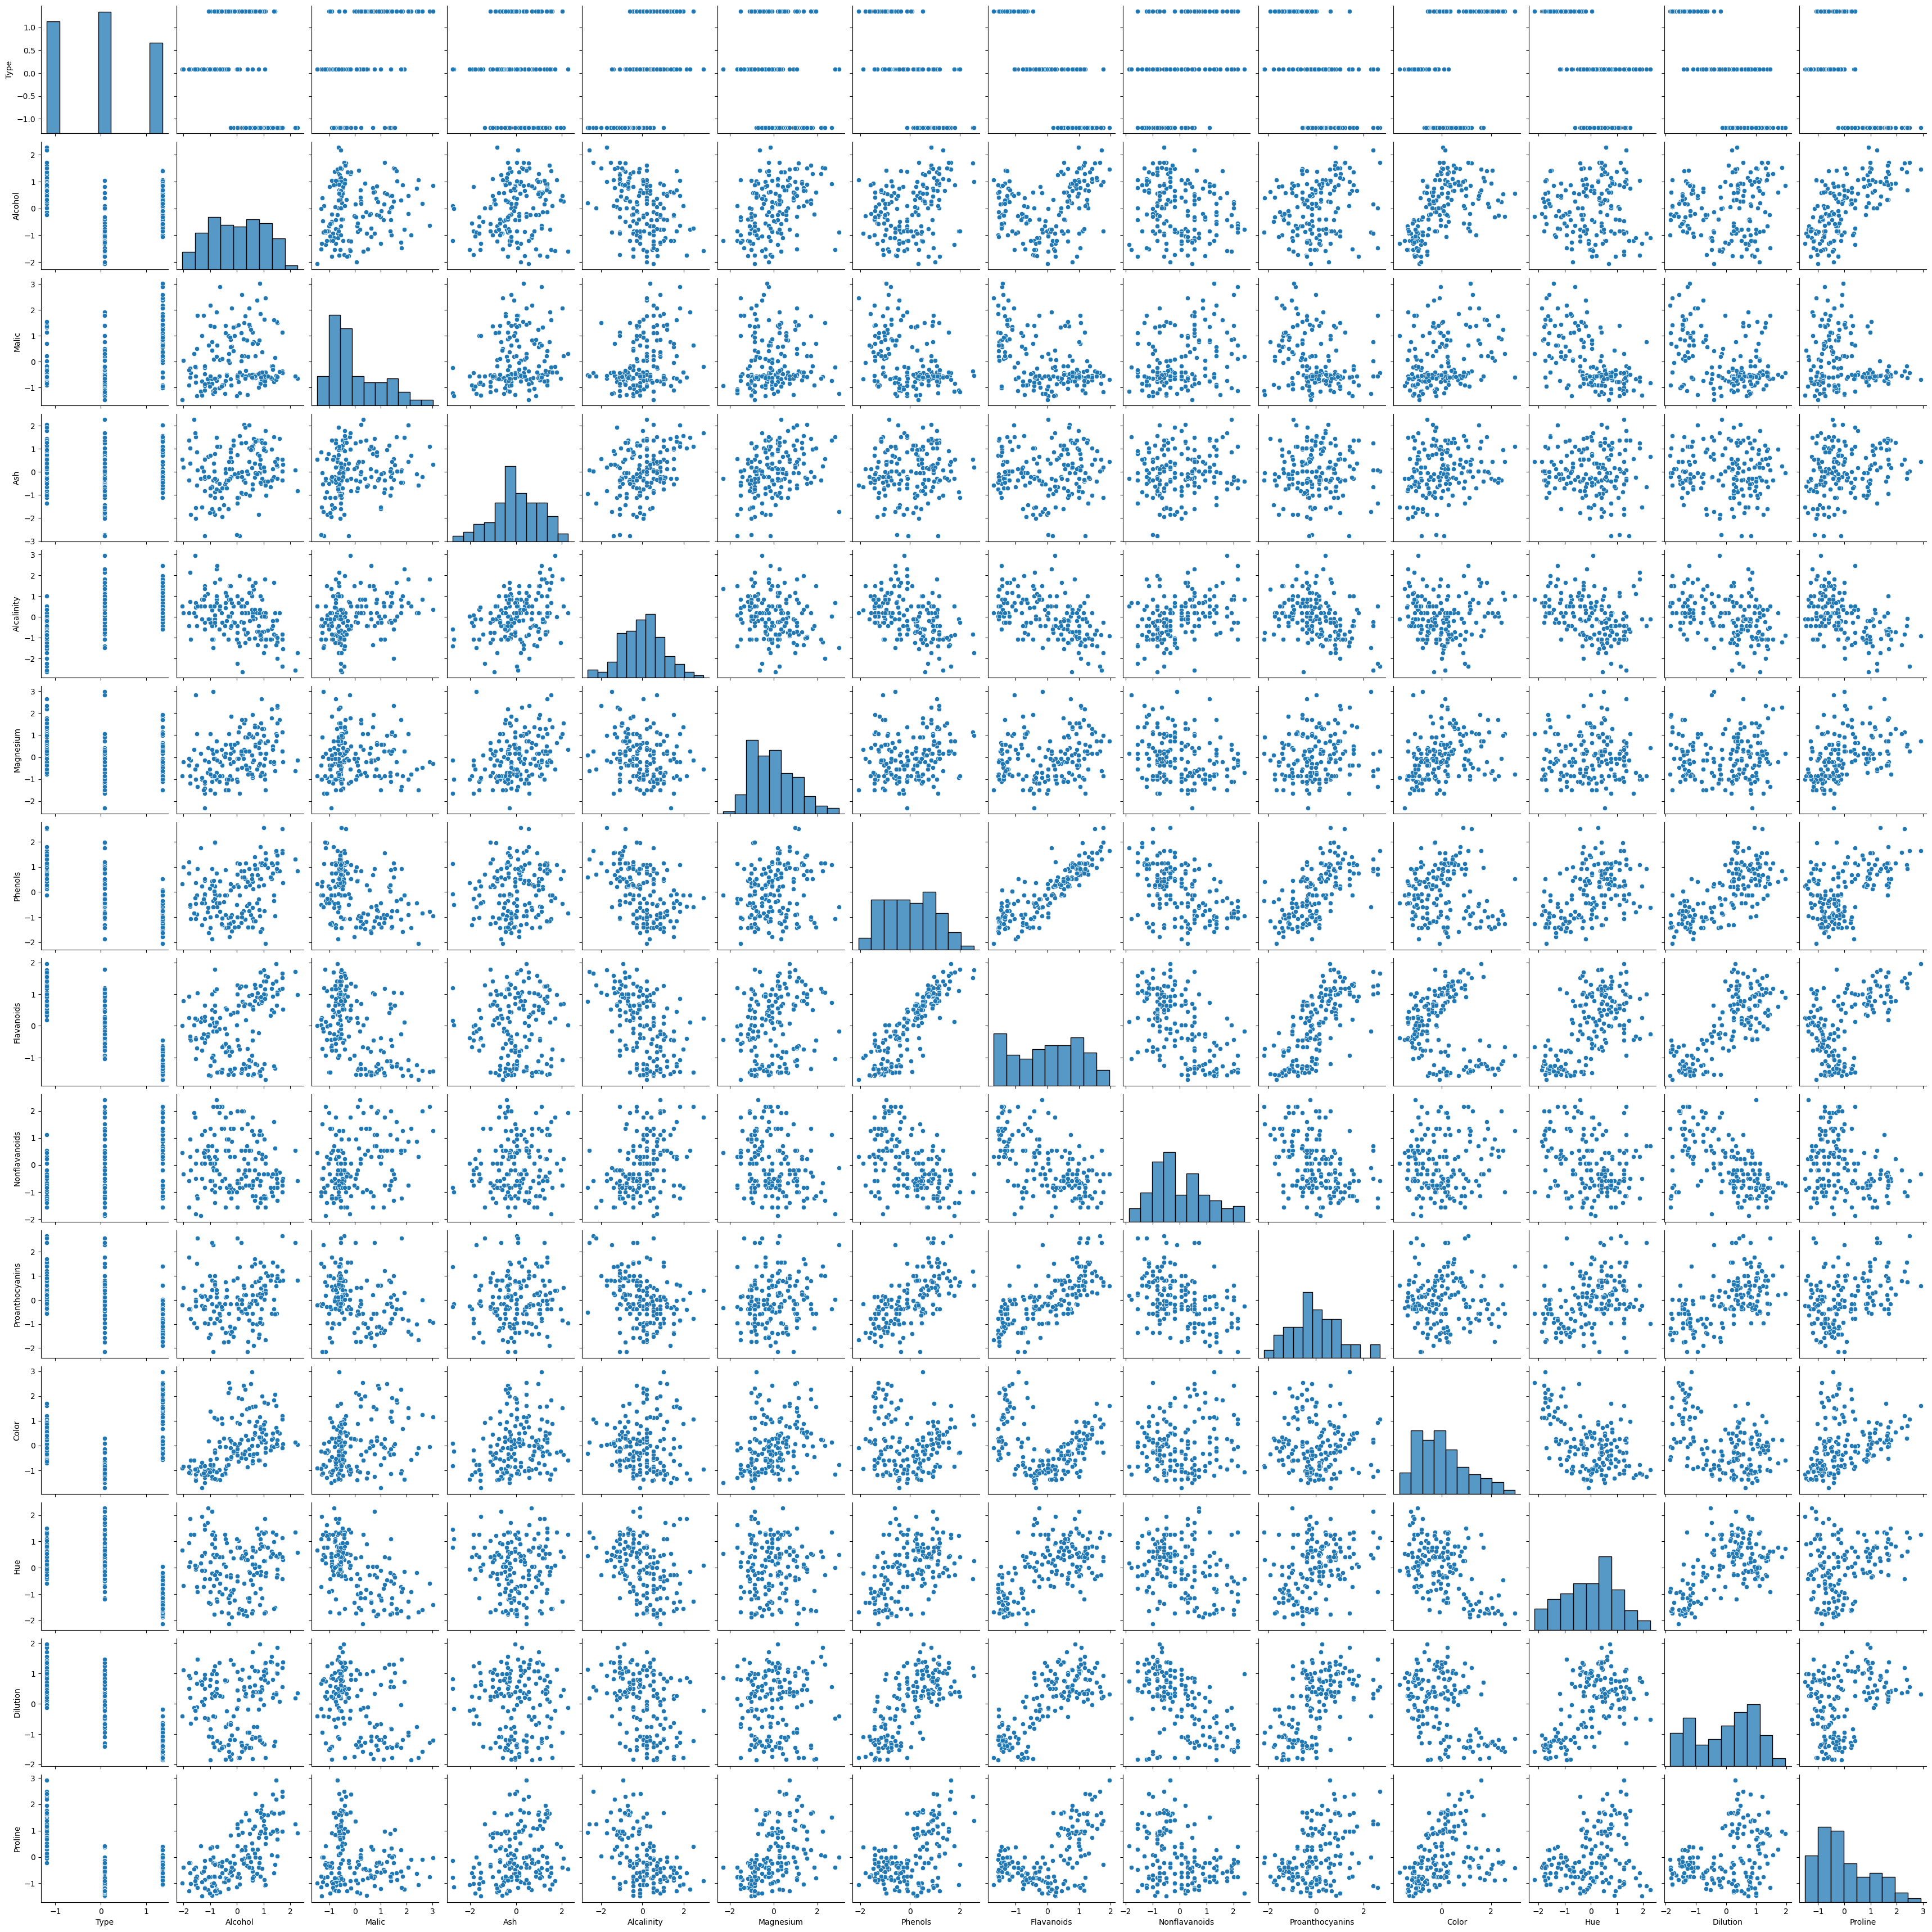

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[numerical_cols])
plt.show()

In [ ]:
#Identify Potential Clusters
#A correlation heatmap can help identify relationships between variables and guide the clustering process.

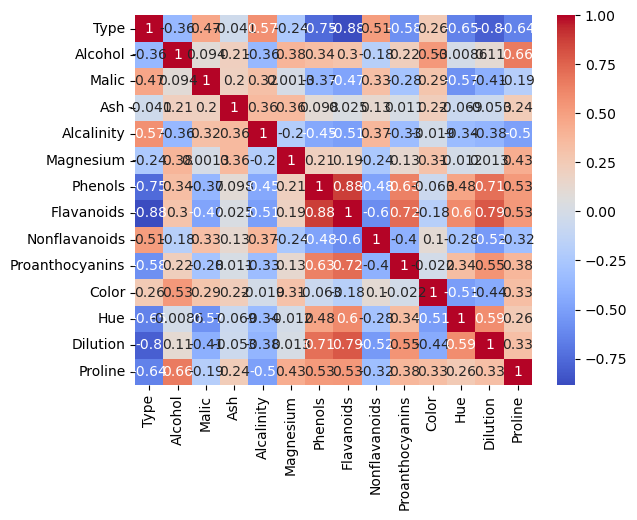

In [15]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Implementing Clustering Algorithms
# K-Means Clustering
# K-Means clustering works by partitioning the data into K clusters. 
# The number of clusters K can be chosen using the Elbow Method or Silhouette Scores.

C:\Users\hi448116\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hi448116\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hi448116\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hi448116\AppData\Roaming\Python\Python312\site-packages\sklea

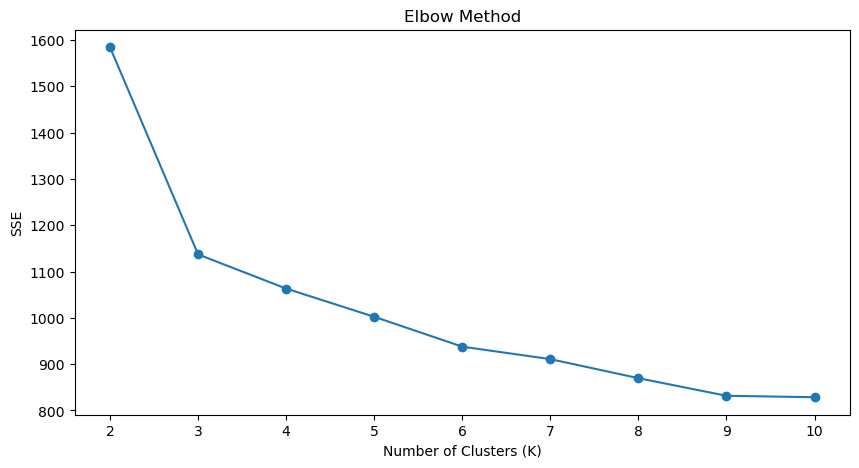

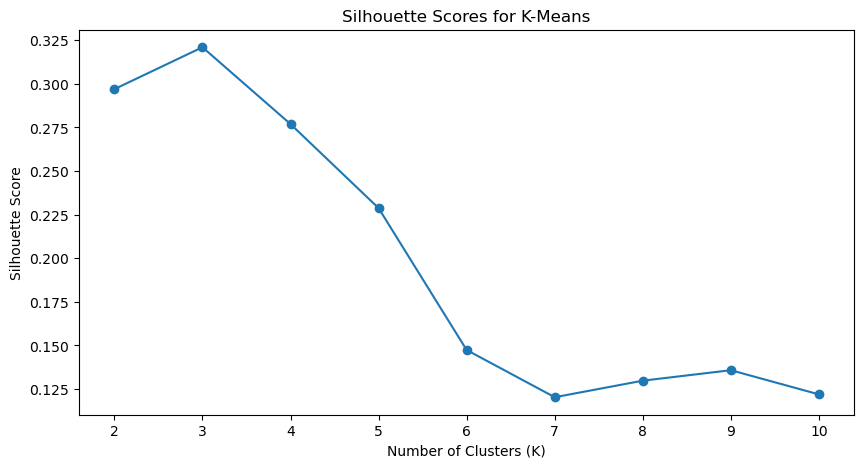

C:\Users\hi448116\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal K using the Elbow Method
sse = []  # Sum of Squared Errors (SSE)
silhouette_scores = []  # Silhouette scores
K_range = range(2, 11)  # Testing K values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[numerical_cols])
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data[numerical_cols], kmeans.labels_))

# Plotting Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Using optimal K (from elbow or silhouette score)
optimal_k = 4  # Example, you can adjust based on analysis
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data[numerical_cols])
data['kmeans_labels'] = kmeans.labels_

In [ ]:
# Hierarchical Clustering
# Hierarchical clustering is a method of cluster analysis which builds a tree of clusters called a dendrogram.

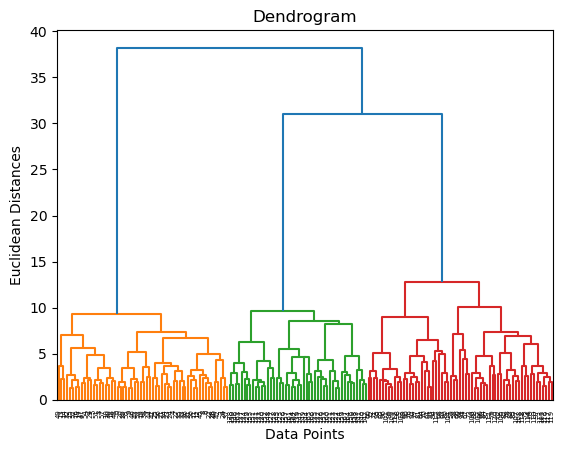

In [17]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram determination of number of clusters
dendrogram = sch.dendrogram(sch.linkage(data[numerical_cols], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Perform Agglomerative Clustering (using optimal K determined from dendrogram)
optimal_k = 4  # Example optimal clusters
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(data[numerical_cols])
data['agglo_labels'] = agglo_labels

In [ ]:
# DBSCAN Clustering
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is good for finding clusters of varying shapes and sizes.
# It uses epsilon and min_samples as parameters to define clusters.

In [19]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data[numerical_cols])
data['dbscan_labels'] = dbscan_labels

In [ ]:
#Cluster Analysis and Interpretation
#Cluster Characteristics
#After clustering, analyze the features in each cluster to interpret the results.

In [20]:
# K-Means Cluster Analysis
data.groupby('kmeans_labels').mean()

# Agglomerative Clustering Analysis
data.groupby('agglo_labels').mean()

# DBSCAN Cluster Analysis (handle -1 as noise)
data[data['dbscan_labels'] != -1].groupby('dbscan_labels').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans_labels,agglo_labels
dbscan_labels,,,,,,,,,,,,,,,,


In [ ]:
# Visualization
# To visualize the clustering results, we can plot the clusters in a 2D space using the two most prominent features (e.g., feature1, feature2).
# If necessary, dimensionality reduction methods like PCA can be used.

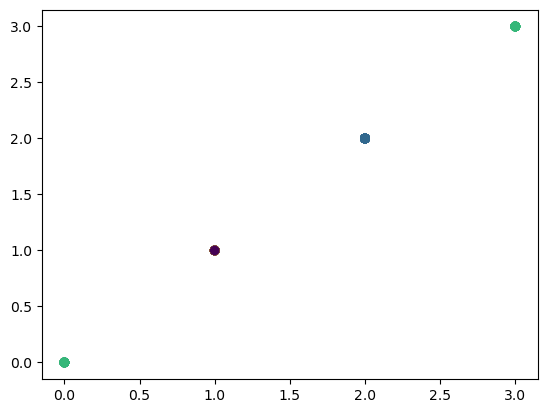

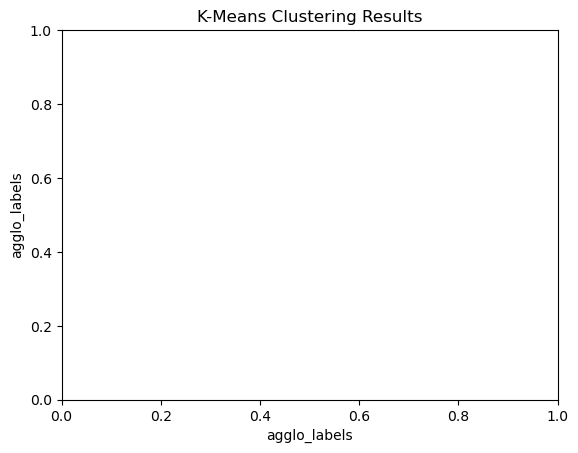

In [30]:
plt.scatter(data['agglo_labels'], data['agglo_labels'], c=data['kmeans_labels'], cmap='viridis')
plt.show()
plt.title('K-Means Clustering Results')
plt.xlabel('agglo_labels')
plt.ylabel('agglo_labels')
plt.show()

# Repeat for Agglomerative and DBSCAN if needed

In [ ]:
# Evaluation and Performance Metrics
# Clustering evaluation is somewhat different from supervised learning. 
# You can use the Silhouette Score, which indicates how similar an object is to its own cluster compared to other clusters.

In [37]:
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(data[numerical_cols], data.Phenols)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

# Silhouette Score for DBSCAN
dbscan_silhouette = silhouette_score(data[numerical_cols], data.Phenols)
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')

Silhouette Score for K-Means: -0.28438892718681186
Silhouette Score for DBSCAN: -0.28438892718681186


In [ ]:
#Insights
#After clustering, derive insights about the clusters:
#Cluster Characteristics: Are there patterns like average income, age, or behavior that differentiate clusters?
#Comparing Clusters: What makes one cluster different from another? For example, do clusters with higher income also have higher education levels?
#Business Implications: How can the clusters be used for business decisions? For example, customer segmentation for targeted marketing.